In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'],'size':14})
rc('text', usetex=True)

import sys
import os
from sklearn.metrics import (recall_score, precision_score,f1_score,matthews_corrcoef, confusion_matrix)

## Generation of validation data (deleting pixels used as training data)

In [10]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
type_im = ["1+","1+","2+","2+","2+", "3+"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_images = len(images)
images_dir = [None] * n_images 

def get_validation_data(method,clf):
    n_seeds = len(seeds)
    f1 = np.zeros((n_images,n_seeds))
    prec = np.zeros((n_images,n_seeds))
    rec = np.zeros((n_images,n_seeds))
    matt = np.zeros((n_images,n_seeds))
    gm = np.zeros((n_images,n_seeds))
    
    for i,im in enumerate(images):
        print(":::: Image :", im, "::::")
        the_dir = output_dir + im + "_rpr_" + method + "/" + clf + "/"
        print("\t:::: dir :", the_dir, "::::")
        the_dir_2 = output_dir + im + "_rpr_" + method + "/"

        if not os.path.exists(the_dir + "val_big_pred"):
            os.makedirs(the_dir + "val_big_pred")
        if not os.path.exists(the_dir + "val_labels"):
            os.makedirs(the_dir + "val_labels")
        if not os.path.exists(the_dir + "val_big_prob"):
            os.makedirs(the_dir + "val_big_prob")

        target_vector = np.load(base_dir + "big_" + type_im[i] + "/labels/" + images[i] + ".npy")
        #print("target_vector.shape", target_vector.shape)
        for j,seed in enumerate(seeds):
            print("\t:::: Seed :", seed, "::::")
            feat_vector = np.load(the_dir + "big_pred/" + str(seed) + "_big_pred.npy")
            #prob_vector = np.load(the_dir + "big_prob/" + str(seed) + "_big_prob.npy")[:,1]
            #print("feat_vector.shape", feat_vector.shape)

            if method != "stratified_random":
                idxs = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_0.npy")
                if os.path.exists(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_1.npy"):
                    idx_1 = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_1.npy")
                    idxs = np.concatenate((idxs,idx_1), axis=0)
            else:
                idxs = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_0.npy")
                if os.path.exists(the_dir_2 + "idx_training_pixels/" + str(seed) + "_1.npy"):
                    idx_1 = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_1.npy")
                    idxs = np.concatenate((idxs,idx_1), axis=0)


            validation_feat_vec = np.delete(feat_vector,idxs)
            #validation_prob = np.delete(prob_vector,idxs)
            #print("validation_feat_vec.shape", validation_feat_vec.shape)
            validation_target_vec = np.delete(target_vector,idxs)
            #print("validation_target_vec.shape", validation_target_vec.shape)

            np.save(the_dir + "/val_big_pred/"+str(j)+".npy",validation_feat_vec)
            #np.save(the_dir + "/val_big_prob/"+str(j)+".npy",validation_prob)
            np.save(the_dir + "/val_labels/"+str(j)+".npy", validation_target_vec)

        #print("\n")

    

#    for i,im in enumerate(images):
#        the_dir = output_dir + im + "_rpr_" +method+ "/" + clf + "/"
#        print(":::: Metrics Image :", im, "::::")
#        for j,seed in enumerate(seeds): 
            val_vector = np.load(the_dir + "val_big_pred/"+str(j)+".npy")
            val_label = np.load(the_dir + "/val_labels/"+str(j)+".npy")
            #print(val_label.shape,val_vector.shape)
            f1[i,j] = f1_score(val_label,val_vector)
            prec[i,j] = precision_score(val_label,val_vector)
            rec[i,j] = recall_score(val_label,val_vector)
            matt[i,j] = matthews_corrcoef(val_label,val_vector)
            cm = confusion_matrix(val_label,val_vector)
            tn=cm[0,0]
            fp=cm[0,1]
            fn=cm[1,0]
            tp=cm[1,1]
            spec = tn/(tn+fp)
            gm[i,j] = np.sqrt(rec[i,j]*spec)
    print(f1,prec,rec,matt,gm)
    return f1, prec, rec,matt,gm


## HALTON: Reading validation data and calculating performance metrics

In [11]:
F1_halton = np.zeros((60,5))
PREC_halton = np.zeros((60,5))
REC_halton = np.zeros((60,5))

classifiers = ["deep_0_cross", "extra_trees_0_cross","knn_0_cross", "rf_0_cross","svm_0"]
for i,clf in enumerate(classifiers):        
    print(":::::",clf, ":::::")
    f1, prec, rec, matt, gm = get_validation_data("halton_patches", classifiers[i])   
    F1_halton[:,i] = f1.ravel()
    PREC_halton[:,i] = prec.ravel()
    REC_halton[:,i] = rec.ravel()
    
    


::::: deep_0_cross :::::
:::: Image : 1+_20 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_20_rpr_halton_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_halton_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_halton_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_halton_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 :

/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
[[ 0.39965841  0.40812775  0.40681734  0.35106814  0.42701372  0.40538748
   0.36191852  0.42117823  0.42066012  0.35245759]
 [ 0.2675083   0.25873343  0.25426449  0.21363569  0.12345679  0.21637953
   0.27202801  0.20657208  0.18865575  0.24881662]
 [ 0.20192202  0.32216572  0.36269985  0.33189674  0.32684595  0.28209297
   0.31581206  0.23286618  0.3817514   0.17717822]
 [ 0.36255185  0.31862109  0.38880617  0.31688076  0.34498535  0.30899067
   0.42847671  0.39272949  0.35156965  0.36775084]
 [ 0.40755441  0.35172638  0.3927004   0.46802141  0.37785221  0.30187684
   0.39085873  0.49636756  0.38910419  0.31903563]
 [ 0.23034806  0.          0.0053599   0.1760862   0.18827843  0.15739944
   0.16665772  0.27608246  0.25870166  0.25388401]] [[ 0.66845206  0.62511759  0.6689295   0.74059599  0.63004152  0.61952284
   0.67833333  

	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_halton_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_halton_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_halton_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::

	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_halton_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_halton_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_halton_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::

In [12]:
halton_patches_best_seeds = np.zeros((6,5))
for j in range(5):
    print(":::::: class :::::::",classifiers[j])
    tmp = np.reshape(F1_halton[:,j],(6,10))
    for k in range(6):
        best_seed = tmp[k,:].argmax()
        print("img", images[k], "seed:", best_seed , "f1:", np.round(tmp[k,:].max(),2))
        halton_patches_best_seeds[k,j] = best_seed
        
print(halton_patches_best_seeds)
np.save(output_dir + "halton_patches_best_seeds.npy", halton_patches_best_seeds)

:::::: class ::::::: deep_0_cross
img 1+_20 seed: 4 f1: 0.43
img 1+_25 seed: 6 f1: 0.27
img 2+_1 seed: 8 f1: 0.38
img 2+_8 seed: 6 f1: 0.43
img 2+_9 seed: 7 f1: 0.5
img 3+_19 seed: 7 f1: 0.28
:::::: class ::::::: extra_trees_0_cross
img 1+_20 seed: 5 f1: 0.41
img 1+_25 seed: 2 f1: 0.27
img 2+_1 seed: 2 f1: 0.32
img 2+_8 seed: 6 f1: 0.37
img 2+_9 seed: 7 f1: 0.48
img 3+_19 seed: 7 f1: 0.28
:::::: class ::::::: knn_0_cross
img 1+_20 seed: 0 f1: 0.41
img 1+_25 seed: 0 f1: 0.27
img 2+_1 seed: 2 f1: 0.32
img 2+_8 seed: 2 f1: 0.37
img 2+_9 seed: 7 f1: 0.49
img 3+_19 seed: 7 f1: 0.3
:::::: class ::::::: rf_0_cross
img 1+_20 seed: 1 f1: 0.43
img 1+_25 seed: 0 f1: 0.28
img 2+_1 seed: 2 f1: 0.33
img 2+_8 seed: 6 f1: 0.39
img 2+_9 seed: 7 f1: 0.5
img 3+_19 seed: 7 f1: 0.29
:::::: class ::::::: svm_0
img 1+_20 seed: 0 f1: 0.38
img 1+_25 seed: 8 f1: 0.24
img 2+_1 seed: 2 f1: 0.33
img 2+_8 seed: 2 f1: 0.36
img 2+_9 seed: 7 f1: 0.46
img 3+_19 seed: 0 f1: 0.33
[[ 4.  5.  0.  1.  0.]
 [ 6.  2.  0.  0. 

(6, 10, 5)


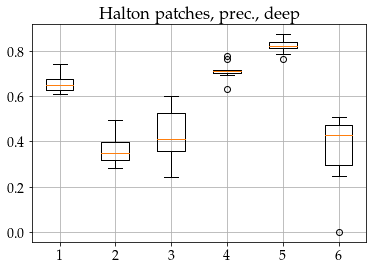

(6, 10, 5)


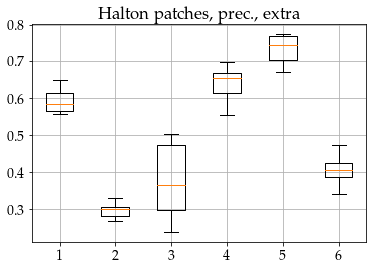

(6, 10, 5)


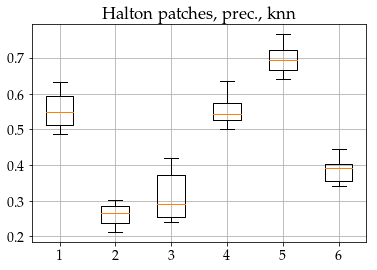

(6, 10, 5)


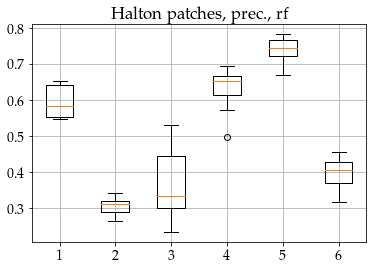

(6, 10, 5)


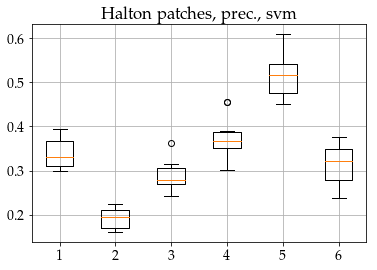

(6, 10, 5)


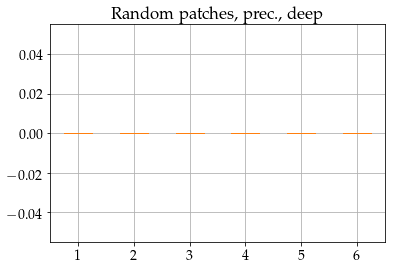

(6, 10, 5)


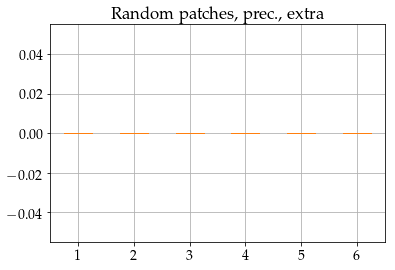

(6, 10, 5)


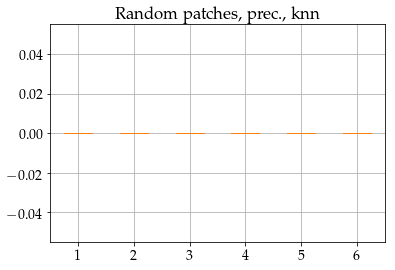

(6, 10, 5)


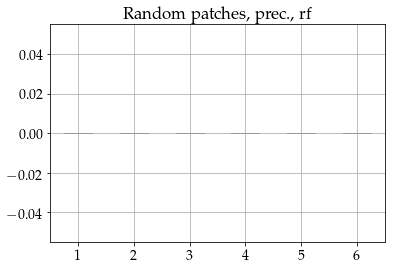

(6, 10, 5)


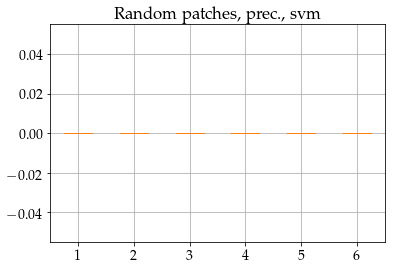

In [13]:
def clf_boxplots(m,t=""):
    for i in range(5):
        x = np.reshape(m,(6,10,5))
        print(x.shape)
        plt.figure()
        plt.boxplot(x[:,:,i].T)
        plt.title(t + classifiers[i].split("_")[0])
        plt.grid()
        plt.show()
        
#clf_boxplots(F1_halton, t="Halton patches, F1, ")
clf_boxplots(PREC_halton, t="Halton patches, prec., ")
clf_boxplots(PREC_random, t="Random patches, prec., ")



(6, 10, 5)


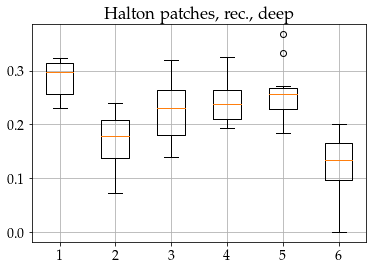

(6, 10, 5)


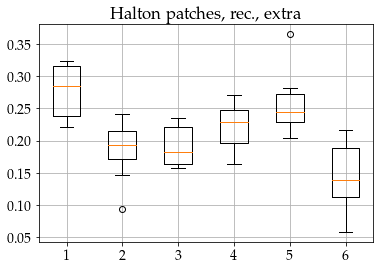

(6, 10, 5)


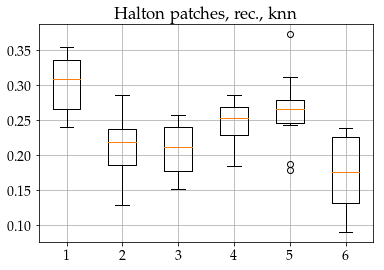

(6, 10, 5)


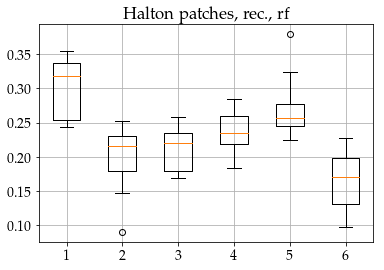

(6, 10, 5)


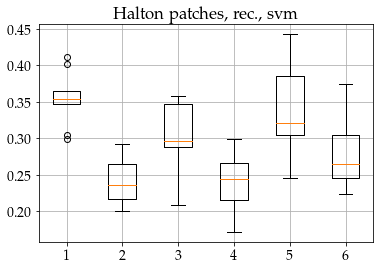

(6, 10, 5)


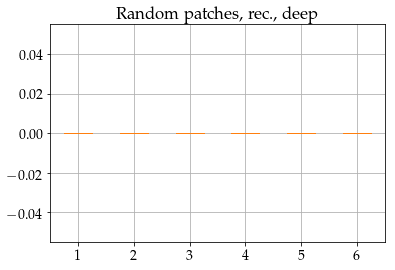

(6, 10, 5)


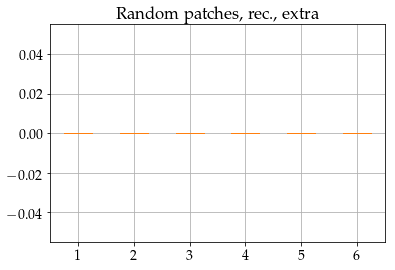

(6, 10, 5)


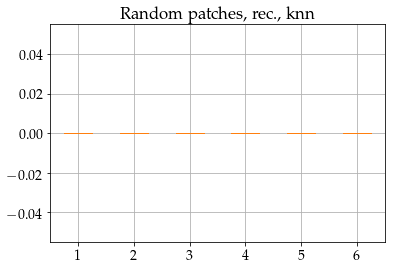

(6, 10, 5)


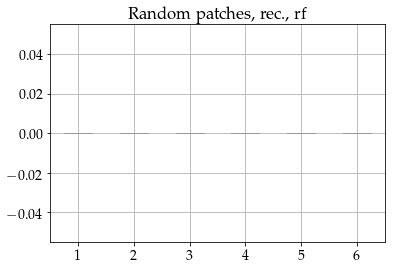

(6, 10, 5)


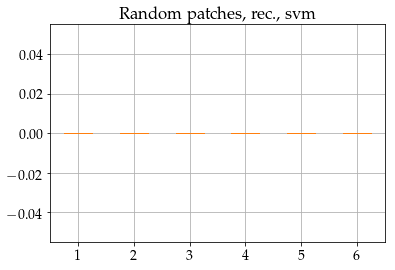

In [14]:
clf_boxplots(REC_halton, t="Halton patches, rec., ")
clf_boxplots(REC_random, t="Random patches, rec., ")

## RANDOM PATCHES: Reading validation data and calculating performance metrics

In [15]:
F1_random = np.zeros((60,5))
PREC_random = np.zeros((60,5))
REC_random= np.zeros((60,5))
for i,clf in enumerate(classifiers):        
    f1, prec, rec, matt, gm = get_validation_data("random_patches", classifiers[i])
    F1_random[:,i] = f1.ravel()
    PREC_random[:,i] = prec.ravel()
    REC_random[:,i] = rec.ravel()
    

:::: Image : 1+_20 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_20_rpr_random_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_random_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_random_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_random_patches/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 :

	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_random_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_random_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_random_patches/knn_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::

	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_random_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_random_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_8_rpr_random_patches/svm_0/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::

In [48]:
random_patches_best_seeds = np.zeros((6,5))
for j in range(5):
    print(":::::: class :::::::",classifiers[j])
    tmp = np.reshape(F1_random[:,j],(6,10))
    for k in range(6):
        best_seed = tmp[k,:].argmax()
        print("img", images[k], "seed:", best_seed, "f1:", np.round(tmp[k,:].max(),2))
        random_patches_best_seeds[k,j] = best_seed
                
print(random_patches_best_seeds)
np.save(output_dir + "random_patches_best_seeds.npy", random_patches_best_seeds)

:::::: class ::::::: deep_0_cross
img 1+_20 seed: 0 f1: 0.47
img 1+_25 seed: 5 f1: 0.3
img 2+_1 seed: 8 f1: 0.41
img 2+_8 seed: 2 f1: 0.42
img 2+_9 seed: 2 f1: 0.6
img 3+_19 seed: 0 f1: 0.41
:::::: class ::::::: extra_trees_0_cross
img 1+_20 seed: 0 f1: 0.42
img 1+_25 seed: 5 f1: 0.3
img 2+_1 seed: 3 f1: 0.31
img 2+_8 seed: 6 f1: 0.41
img 2+_9 seed: 8 f1: 0.55
img 3+_19 seed: 7 f1: 0.35
:::::: class ::::::: knn_0_cross
img 1+_20 seed: 7 f1: 0.42
img 1+_25 seed: 5 f1: 0.29
img 2+_1 seed: 8 f1: 0.29
img 2+_8 seed: 6 f1: 0.41
img 2+_9 seed: 8 f1: 0.54
img 3+_19 seed: 6 f1: 0.37
:::::: class ::::::: rf_0_cross
img 1+_20 seed: 3 f1: 0.43
img 1+_25 seed: 4 f1: 0.28
img 2+_1 seed: 1 f1: 0.31
img 2+_8 seed: 6 f1: 0.42
img 2+_9 seed: 8 f1: 0.56
img 3+_19 seed: 6 f1: 0.38
:::::: class ::::::: svm_0_cross
img 1+_20 seed: 2 f1: 0.37
img 1+_25 seed: 7 f1: 0.2
img 2+_1 seed: 8 f1: 0.28
img 2+_8 seed: 6 f1: 0.26
img 2+_9 seed: 2 f1: 0.42
img 3+_19 seed: 7 f1: 0.34
[[ 0.  0.  7.  3.  2.]
 [ 5.  5.  5.

## STRATIFIED RANDOM: Reading validation data and calculating performance metrics

In [23]:
classifiers = ["deep_0_cross", "extra_trees_0_cross","knn_0_cross", "rf_0_cross","svm_0_cross"]
F1_strati = np.zeros((60,5))
PREC_strati = np.zeros((60,5))
REC_strati = np.zeros((60,5))
for i,clf in enumerate(classifiers):        
    f1, prec, rec, matt, gm = get_validation_data("stratified_random", classifiers[i])
    F1_strati[:,i] = f1.ravel()
    PREC_strati[:,i] = prec.ravel()
    REC_strati[:,i] = rec.ravel()

:::: Image : 1+_20 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_20_rpr_stratified_random/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_25 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_25_rpr_stratified_random/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_1 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_1_rpr_stratified_random/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_8 ::::
	:::: dir : /home/rpez

/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 2+_9 ::::
	:::: dir : /home/rpezoa/experiment_data/output/2+_9_rpr_stratified_random/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 3+_19 ::::
	:::: dir : /home/rpezoa/experiment_data/output/3+_19_rpr_stratified_random/deep_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::
:::: Image : 1+_20 ::::
	:::: dir : /home/rpezoa/experiment_data/output/1+_20_rpr_stratified_random/extra_trees_0_cross/ ::::
	:::: Seed : 0 ::::
	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 :::

	:::: Seed : 1 ::::
	:::: Seed : 2 ::::
	:::: Seed : 3 ::::
	:::: Seed : 4 ::::
	:::: Seed : 5 ::::
	:::: Seed : 6 ::::
	:::: Seed : 7 ::::
	:::: Seed : 8 ::::
	:::: Seed : 9 ::::


In [55]:
stratified_pixels_best_seeds = np.zeros((6,5))
for j in range(5):
    print(":::::: class :::::::",classifiers[j])
    tmp = np.reshape(F1_strati[:,j],(6,10))
    best_seed = tmp[k,:].argmax()
    for k in range(6):
        print("img", images[k], "seed:", best_seed, "f1:", np.round(tmp[k,:].max(),2))
        stratified_pixels_best_seeds[k,j] = best_seed        
                
print(stratified_pixels_best_seeds)
np.save(output_dir + "stratified_random_best_seeds.npy", stratified_pixels_best_seeds)
print(F1_strati.shape)

:::::: class ::::::: deep_0_cross
img 1+_20 seed: 8 f1: 0.49
img 1+_25 seed: 8 f1: 0.35
img 2+_1 seed: 8 f1: 0.45
img 2+_8 seed: 8 f1: 0.49
img 2+_9 seed: 8 f1: 0.61
img 3+_19 seed: 8 f1: 0.42
:::::: class ::::::: extra_trees_0_cross
img 1+_20 seed: 9 f1: 0.47
img 1+_25 seed: 9 f1: 0.34
img 2+_1 seed: 9 f1: 0.44
img 2+_8 seed: 9 f1: 0.47
img 2+_9 seed: 9 f1: 0.58
img 3+_19 seed: 9 f1: 0.36
:::::: class ::::::: knn_0_cross
img 1+_20 seed: 9 f1: 0.48
img 1+_25 seed: 9 f1: 0.34
img 2+_1 seed: 9 f1: 0.44
img 2+_8 seed: 9 f1: 0.47
img 2+_9 seed: 9 f1: 0.59
img 3+_19 seed: 9 f1: 0.38
:::::: class ::::::: rf_0_cross
img 1+_20 seed: 9 f1: 0.48
img 1+_25 seed: 9 f1: 0.36
img 2+_1 seed: 9 f1: 0.45
img 2+_8 seed: 9 f1: 0.48
img 2+_9 seed: 9 f1: 0.6
img 3+_19 seed: 9 f1: 0.38
:::::: class ::::::: svm_0_cross
img 1+_20 seed: 1 f1: 0.32
img 1+_25 seed: 1 f1: 0.22
img 2+_1 seed: 1 f1: 0.32
img 2+_8 seed: 1 f1: 0.34
img 2+_9 seed: 1 f1: 0.52
img 3+_19 seed: 1 f1: 0.35
[[ 8.  9.  9.  9.  1.]
 [ 8.  9. 

In [25]:
print(np.round(F1_halton.mean(axis=0),2))
print(np.round(F1_random.mean(axis=0),2))
#np.save(base_dir + "output/F1_halton_full.npy", F1_halton)
#np.save(base_dir + "output/F1_random_full.npy", F1_random)

[ 0.31  0.29  0.3   0.31  0.31]
[ 0.29  0.25  0.29  0.28  0.21]


halton [ 0.31  0.29  0.3   0.31  0.31]
random [ 0.29  0.25  0.29  0.28  0.21]
strati [ 0.44  0.43  0.43  0.45  0.33]


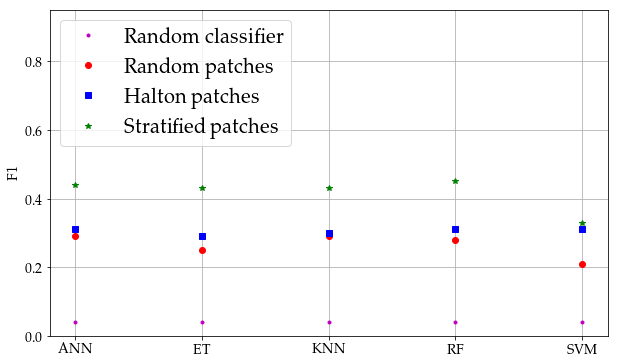

In [109]:
n_class = len(classifiers)
F1_halton_means = np.zeros(n_class)
F1_random_means = np.zeros(n_class)
F1_stratified_means = np.zeros(n_class)

for i in range(n_class):
    F1_halton_means[i] = np.round(F1_halton[:,i].mean(),2)
    F1_random_means[i] = np.round(F1_random[:,i].mean(),2)
    F1_stratified_means[i] = np.round(F1_strati[:,i].mean(),2)

print("halton", F1_halton_means)
print("random",F1_random_means)
print("strati", F1_stratified_means)

plt.figure(figsize=(10,6))
#plt.figure()
plt.plot(np.asanyarray([0.04,0.04,0.04,0.04,0.04]),'.m', label="Random classifier")
plt.plot(F1_random_means,'or', label="Random patches")
plt.plot(F1_halton_means,'sb',label='Halton patches')

plt.plot(F1_stratified_means,'*g', label="Stratified patches")

#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='upper left', fontsize='x-large')
plt.grid()
plt.ylabel("F1")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.95)
plt.xticks([0,1,2,3,4],["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

(60, 5)


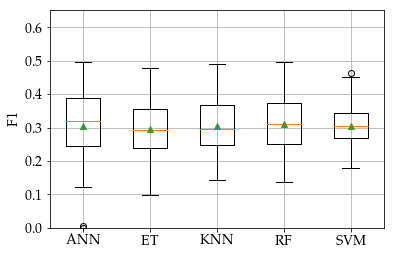

In [43]:
print(F1_halton.shape)
plt.figure()
plt.boxplot(F1_halton,showmeans=True)
plt.ylim(0,0.65)
plt.grid()
plt.ylabel("F1")
plt.xticks(range(1,6),["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

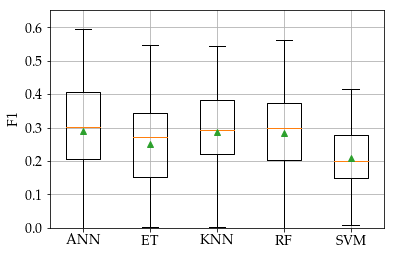

In [44]:
plt.figure()
plt.boxplot(F1_random,showmeans=True)
plt.grid()
plt.ylabel("F1")
plt.ylim(0,0.65)
plt.xticks(range(1,6),["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

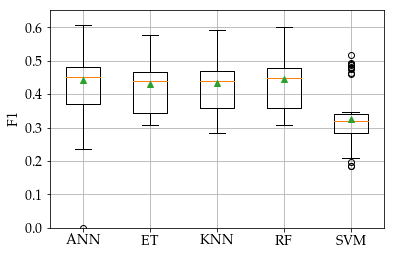

In [45]:
plt.figure()
plt.boxplot(F1_strati,showmeans=True)
plt.grid()
plt.ylim(0,0.65) 
plt.ylabel("F1")
plt.xticks(range(1,6),["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

halton [ 0.56  0.51  0.46  0.51  0.34]
random [ 0.43  0.41  0.37  0.41  0.25]
strati [ 0.46  0.43  0.42  0.45  0.22]


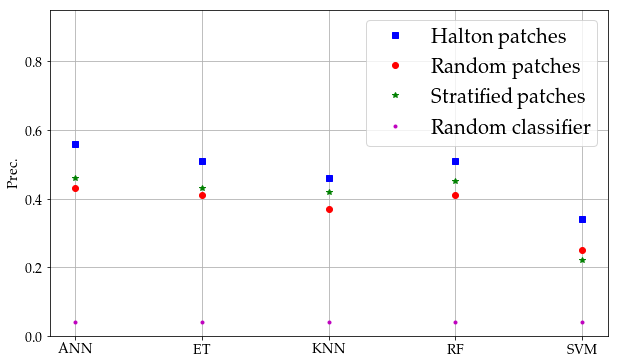

In [32]:
n_class = len(classifiers)
PREC_halton_means = np.zeros(n_class)
PREC_random_means = np.zeros(n_class)
PREC_stratified_means = np.zeros(n_class)

for i in range(n_class):
    PREC_halton_means[i] = np.round(PREC_halton[:,i].mean(),2)
    PREC_random_means[i] = np.round(PREC_random[:,i].mean(),2)
    PREC_stratified_means[i] = np.round(PREC_strati[:,i].mean(),2)

print("halton", PREC_halton_means)
print("random",PREC_random_means)
print("strati", PREC_stratified_means)

plt.figure(figsize=(10,6))
plt.plot(PREC_halton_means,'sb',label='Halton patches')
plt.plot(PREC_random_means,'or', label="Random patches")
plt.plot(PREC_stratified_means,'*g', label="Stratified patches")
plt.plot(np.asanyarray([0.04,0.04,0.04,0.04,0.04]),'.m', label="Random classifier")
#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='upper right', fontsize='x-large')
plt.grid()
plt.ylabel("Prec.")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.95)
plt.xticks([0,1,2,3,4],["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

## RECALL

halton [ 0.22  0.21  0.23  0.23  0.29]
random [ 0.25  0.2   0.27  0.26  0.2 ]
strati [ 0.45  0.44  0.46  0.46  0.71]


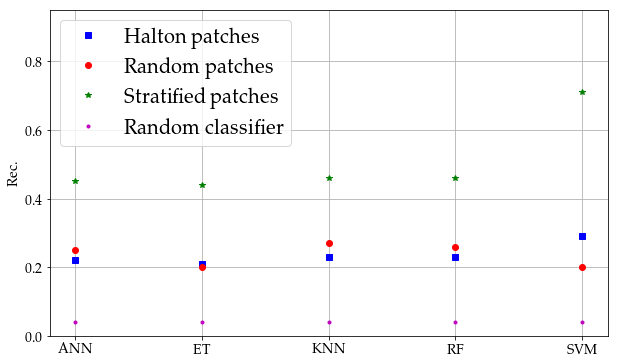

In [31]:
n_class = len(classifiers)
REC_halton_means = np.zeros(n_class)
REC_random_means = np.zeros(n_class)
REC_stratified_means = np.zeros(n_class)

for i in range(n_class):
    REC_halton_means[i] = np.round(REC_halton[:,i].mean(),2)
    REC_random_means[i] = np.round(REC_random[:,i].mean(),2)
    REC_stratified_means[i] = np.round(REC_strati[:,i].mean(),2)

print("halton", REC_halton_means)
print("random",REC_random_means)
print("strati", REC_stratified_means)

plt.figure(figsize=(10,6))
plt.plot(REC_halton_means,'sb',label='Halton patches')
plt.plot(REC_random_means,'or', label="Random patches")
plt.plot(REC_stratified_means,'*g', label="Stratified patches")
plt.plot(np.asanyarray([0.04,0.04,0.04,0.04,0.04]),'.m', label="Random classifier")
#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='upper left', fontsize='x-large')
plt.grid()
plt.ylabel("Rec.")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.95)
plt.xticks([0,1,2,3,4],["ANN", "ET", "KNN", "RF", "SVM"])
plt.show()

In [56]:
PREC_halton.shape

(60, 5)

In [57]:
PREC_halton.shape

(60, 5)

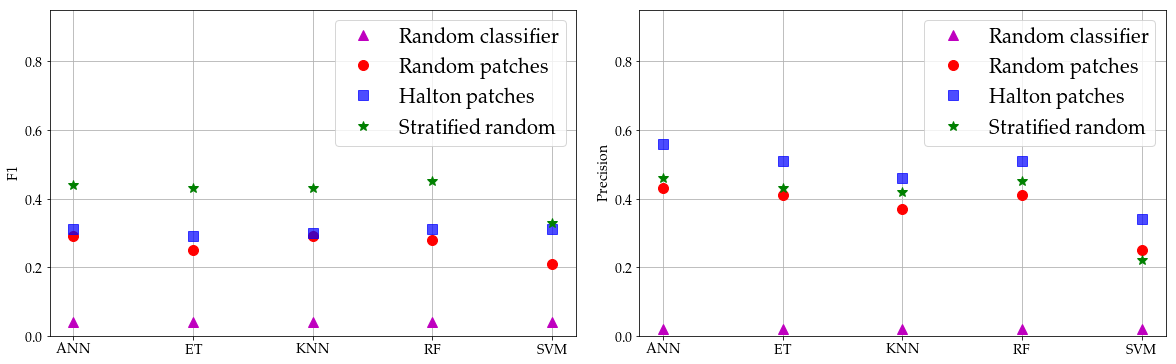

In [145]:






plt.figure(figsize=(20,6))
plt.subplot(121)

#plt.figure()
n=10
plt.plot(np.asanyarray([0.04,0.04,0.04,0.04,0.04]),'^m', label="Random classifier", markersize=n)
plt.plot(F1_random_means,'or', label="Random patches", markersize=n)
plt.plot(F1_halton_means,'sb',label='Halton patches', markersize=n, alpha=0.7)
plt.plot(F1_stratified_means,'*g', label="Stratified random", markersize=n)

#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='upper right', fontsize='x-large')
plt.grid()
plt.ylabel("F1")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.95)
plt.xticks([0,1,2,3,4],["ANN", "ET", "KNN", "RF", "SVM"])

plt.subplot(122)
plt.plot(np.asanyarray([0.02,0.02,0.02,0.02,0.02]),'^m', label="Random classifier", markersize=n)
plt.plot(PREC_random_means,'or', label="Random patches", markersize=n)
plt.plot(PREC_halton_means,'sb',label='Halton patches', markersize=n, alpha=0.7)
plt.plot(PREC_stratified_means,'*g', label="Stratified random", markersize=n)

#baseLine = [0.04,0.04,0.04,0.04,0.04]
#plt.plot(baseLine,'g-', label="Random classifier" )
plt.legend(loc='upper right', fontsize='x-large')
plt.grid()
plt.ylabel("Precision")
#plt.xticks("SVM","Deep", "RF")
plt.ylim(0,0.95)
plt.xticks([0,1,2,3,4],["ANN", "ET", "KNN", "RF", "SVM"])

plt.subplots_adjust(wspace=0.12)

plt.show()



In [122]:
print(F1_halton_means)
print(np.round(F1_halton_means.mean(),2))

[ 0.31  0.29  0.3   0.31  0.31]
0.3


In [125]:
print(F1_stratified_means)
print(np.round(F1_stratified_means.mean(),2))

[ 0.44  0.43  0.43  0.45  0.33]
0.42


In [126]:
print(PREC_halton_means)
print(np.round(PREC_halton_means.mean(),2))

[ 0.56  0.51  0.46  0.51  0.34]
0.48


In [127]:
print(PREC_stratified_means)
print(np.round(PREC_stratified_means.mean(),2))

[ 0.46  0.43  0.42  0.45  0.22]
0.4


In [128]:
print(F1_random_means)
print(np.round(F1_random.mean(),2))

[ 0.29  0.25  0.29  0.28  0.21]
0.26


In [129]:
print(PREC_random_means)
print(np.round(PREC_random_means.mean(),2))

[ 0.43  0.41  0.37  0.41  0.25]
0.37


In [113]:
0.8/4

0.2

In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X, y)
print(sorted(Counter(y_resampled).items()))

ImportError: A sklearn version of at least 0.19.0 is required to use imbalanced-learn. 0.18.1 was found. Please upgrade sklearn